In [74]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split

### Plot params

In [75]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [76]:
data_train = pd.read_csv("./data_sets/train.csv")
data_test = pd.read_csv("./data_sets/test.csv")

In [77]:
(X,y) = (data_train.drop(columns=["label"]), data_train["label"])

In [78]:
print(y.shape)

(42000,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=17)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train.values.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.values.reshape(X_test.shape[0], 1, 28, 28)
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range


In [80]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


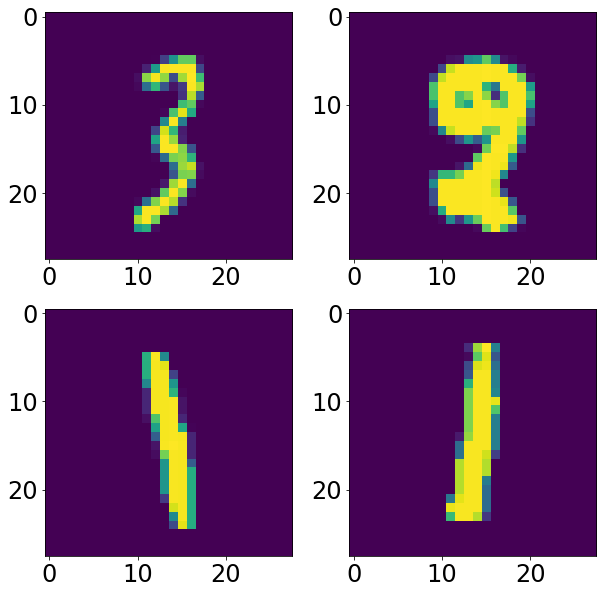

In [144]:
f = plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
ax.imshow(X_train[0].reshape([28, 28]))

ax = plt.subplot(2, 2, 2)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

ax = plt.subplot(2, 2, 3)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

ax = plt.subplot(2, 2, 4)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28, 28]))

plt.show()

In [82]:
batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 15 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

In [83]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(60, (3, 3), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [84]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='Adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy


In [85]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.3)

Train on 20580 samples, validate on 8820 samples
Epoch 1/15
20580/20580 [==============================] - 84s 4ms/step - loss: 1.1508 - acc: 0.7425 - val_loss: 0.4040 - val_acc: 0.9349
Epoch 2/15
20580/20580 [==============================] - 87s 4ms/step - loss: 0.2801 - acc: 0.9474 - val_loss: 0.1770 - val_acc: 0.9600
Epoch 3/15
20580/20580 [==============================] - 72s 3ms/step - loss: 0.1562 - acc: 0.9659 - val_loss: 0.1179 - val_acc: 0.9689
Epoch 4/15
20580/20580 [==============================] - 68s 3ms/step - loss: 0.1100 - acc: 0.9741 - val_loss: 0.0961 - val_acc: 0.9730
Epoch 5/15
20580/20580 [==============================] - 65s 3ms/step - loss: 0.0878 - acc: 0.9776 - val_loss: 0.0743 - val_acc: 0.9789
Epoch 6/15
20580/20580 [==============================] - 65s 3ms/step - loss: 0.0689 - acc: 0.9818 - val_loss: 0.0644 - val_acc: 0.9814
Epoch 7/15
20580/20580 [==============================] - 64s 3ms/step - loss: 0.0550 - acc: 0.9864 - val_loss: 0.0597 - val_acc:

In [86]:
model.evaluate(X_test,y_test, verbose=1)

12600/12600 [==============================] - 18s 1ms/step


[0.04446675351776538, 0.9875396825396825]

## Draw Plots of errors

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


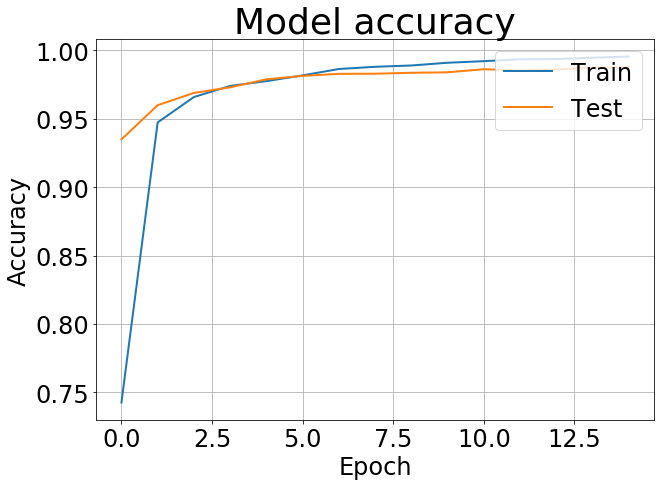

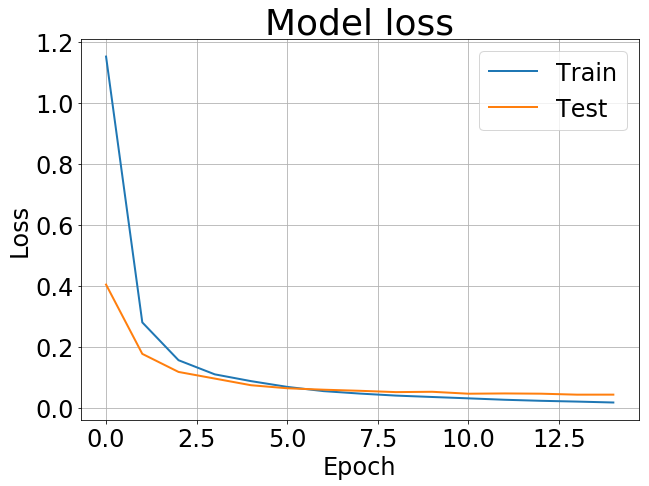

In [106]:
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()

## Кривые обучения

In [88]:
set_sizes = np.arange(1000, 10000, 1000)
set_sizes = np.hstack((set_sizes, list(range(10, 100, 10))))
set_sizes = np.hstack((set_sizes, list(range(100, 1000, 100))))
set_sizes = np.sort(set_sizes)
accuracy_metric = []

In [89]:
for size in set_sizes:
    print(size)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), size, replace=False)
    model.fit(X_train[used_indices, :], y_train[used_indices, :],
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_split=0.3)
    accuracy_metric.append(model.evaluate(X_test,y_test, verbose=1))
    print(accuracy_metric[-1])

10
12600/12600 [==============================] - 18s 1ms/step
[0.04928602232538637, 0.9855555555555555]
20
12600/12600 [==============================] - 18s 1ms/step
[0.05631801887577961, 0.9838095238095238]
30
12600/12600 [==============================] - 18s 1ms/step
[0.17770407861305607, 0.9468253968253968]
40
12600/12600 [==============================] - 18s 1ms/step
[0.06857769869918388, 0.9806349206349206]
50
12600/12600 [==============================] - 19s 1ms/step
[0.08748564054805134, 0.9723809523431082]
60
12600/12600 [==============================] - 18s 1ms/step
[0.08012570156021014, 0.9759523809145367]
70
12600/12600 [==============================] - 19s 1ms/step
[0.09648513784543389, 0.9722222222222222]
80
12600/12600 [==============================] - 19s 1ms/step
[0.06223973409302296, 0.981904761904762]
90
12600/12600 [==============================] - 19s 2ms/step
[0.05972475047193704, 0.9821428571428571]
100
12600/12600 [==============================] - 19s 1

In [104]:
accuracy_loss = np.asarray(accuracy_metric)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


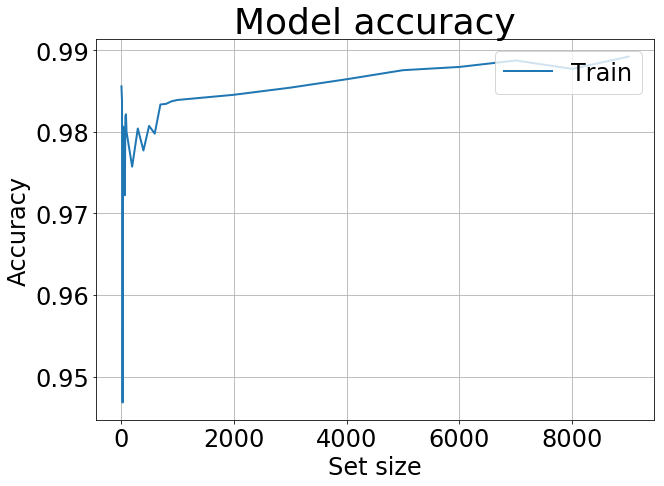

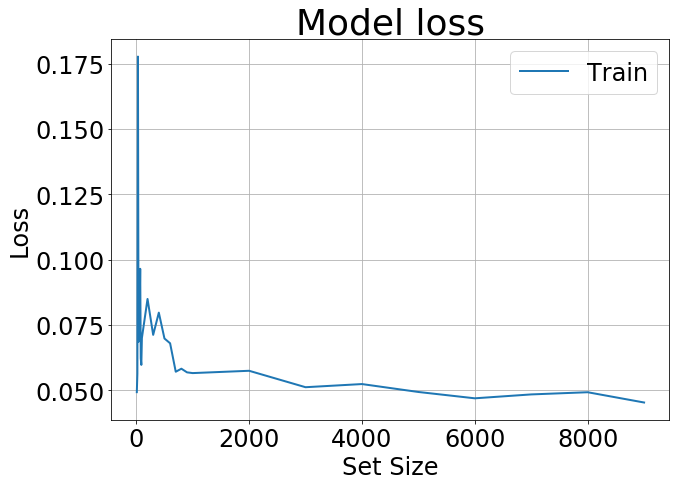

In [105]:
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_loss[:, 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Set size')
plt.legend(['Train'], loc='upper right')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_loss[:, 0])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Set Size')
plt.legend(['Train'], loc='upper right')
plt.grid()
plt.show()

## Добавим шум к нашим данным

In [120]:
def get_noisy_x(X_train, mean, stddev):
    n_imgs = X_train.shape[0]
    n_chan = X_train.shape[1]
    n_rows = X_train.shape[2]
    n_cols = X_train.shape[3]
    if stddev == 0:
        noise = np.zeros((n_imgs, n_chan, n_rows, n_cols))
    else:
        noise = np.random.normal(mean, stddev/255., 
                                     (n_imgs, n_chan, n_rows, n_cols))
    noisy_X = X_train + noise
    noisy_X = np.clip(noisy_X, 0., 1.)
    return noisy_X


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


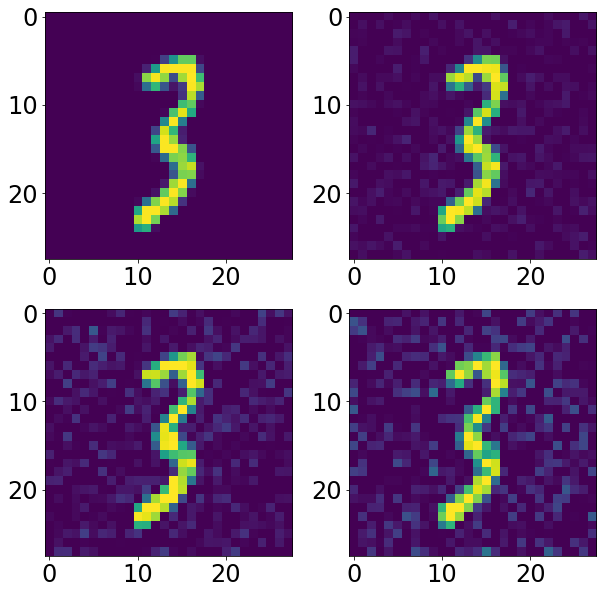

In [147]:
f = plt.figure(figsize=(10, 10))
for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    ax.imshow(get_noisy_x(X_train, mean=0, stddev=10*(i - 1))[0].reshape([28, 28]))
plt.show()

In [159]:
noises = [x for x in range(0, 110, 10)]
histories = []

In [160]:
for noise in noises:
    print(noise)
    histories.append(model.fit(get_noisy_x(X_train, mean=0, stddev=noise), y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_split=0.3))

0
10
20
30
40
50
60
70
80
90
100


In [161]:
print(histories)

[<keras.callbacks.History object at 0x130186208>, <keras.callbacks.History object at 0x130e80e10>, <keras.callbacks.History object at 0x130e7ceb8>, <keras.callbacks.History object at 0x130e7ce10>, <keras.callbacks.History object at 0x1301be828>, <keras.callbacks.History object at 0x1301be780>, <keras.callbacks.History object at 0x1301be6d8>, <keras.callbacks.History object at 0x1301be630>, <keras.callbacks.History object at 0x1301be588>, <keras.callbacks.History object at 0x1301be4e0>, <keras.callbacks.History object at 0x1301be438>]


## Построим графики

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


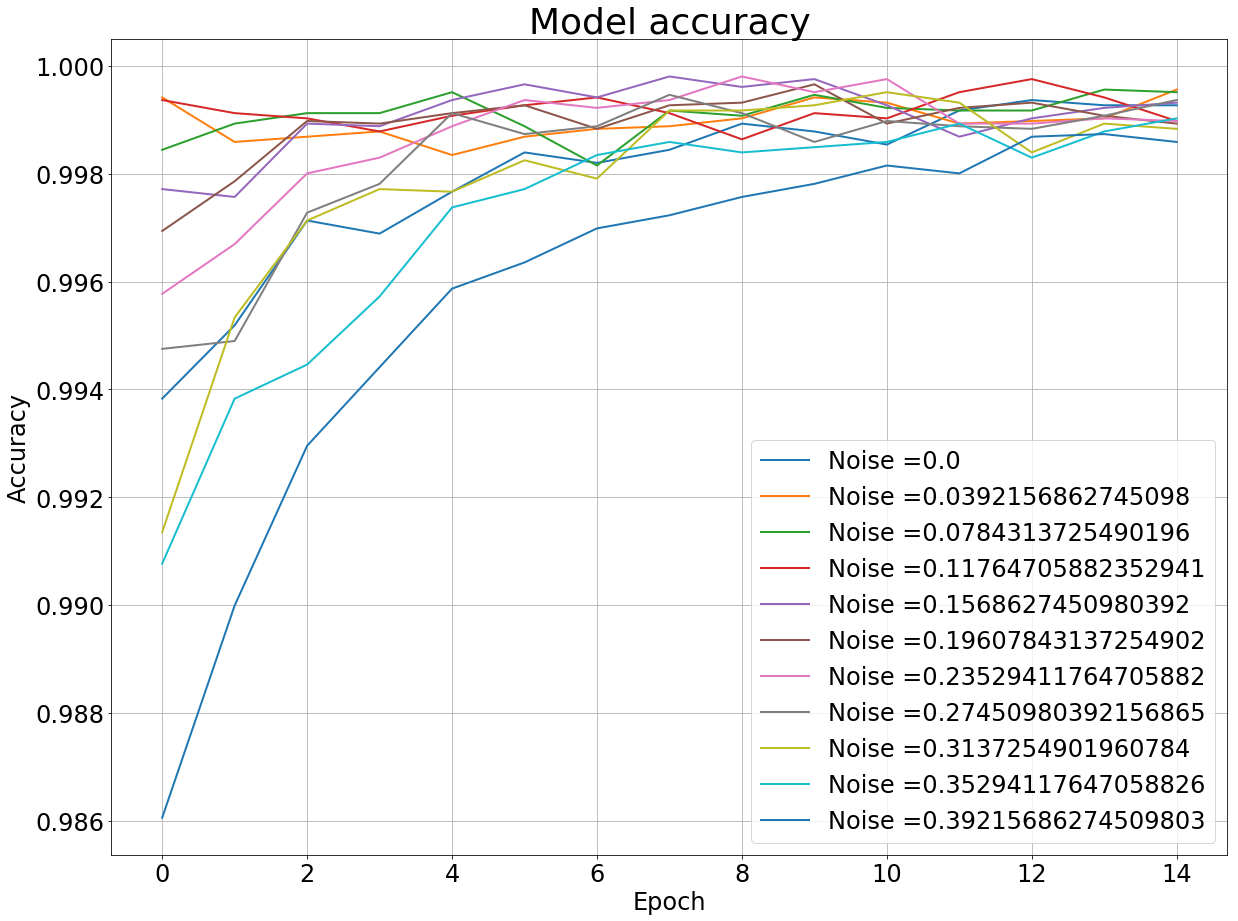

In [175]:
plt.figure(figsize=(20, 15))
i = 0
for history in histories:  
    plt.plot(history.history['acc'], label="Noise =" + str(noises[i]/ 255))
    i+= 1
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy')
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


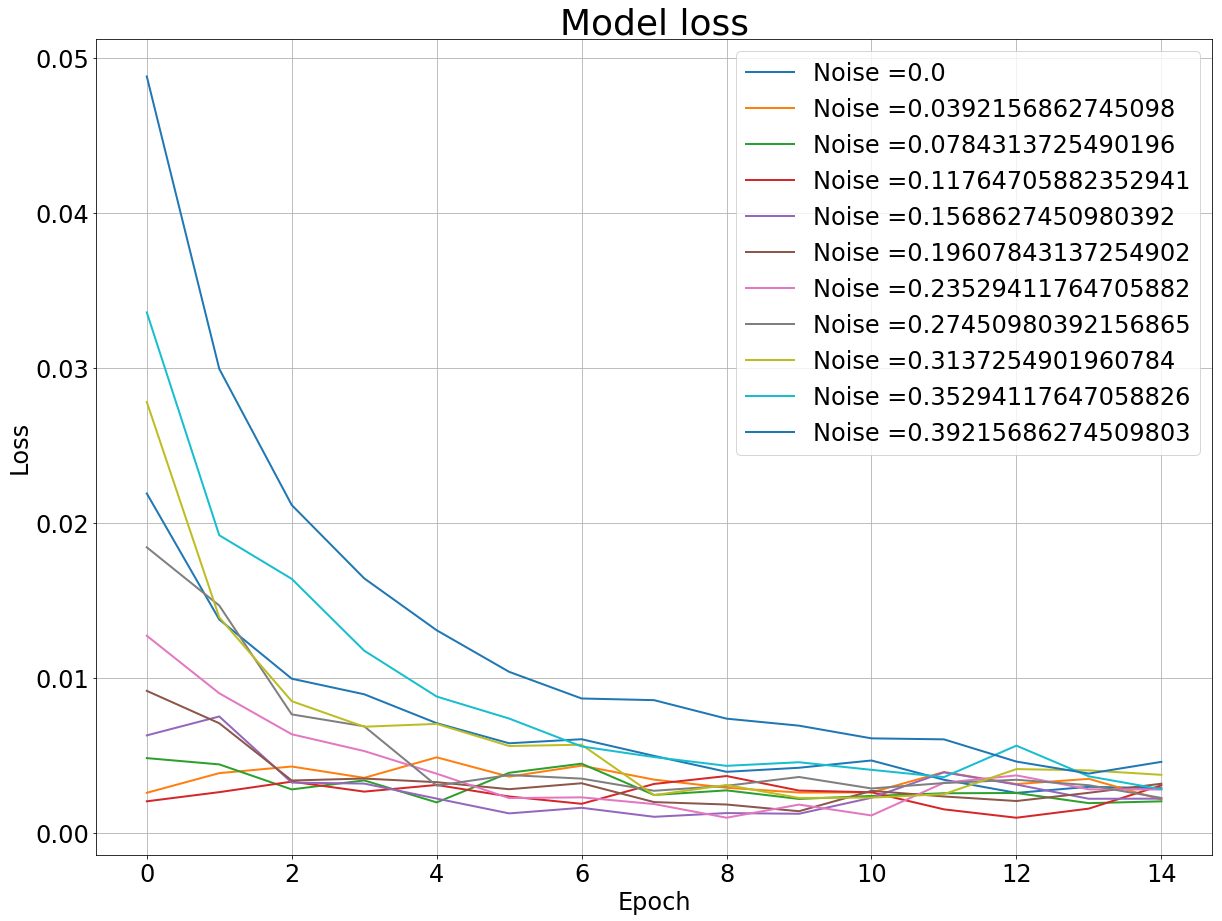

In [174]:
plt.figure(figsize=(20, 15))
i = 0
for history in histories:  
    plt.plot(history.history['loss'], label="Noise =" + str(noises[i]/255))
    i+= 1
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model loss')
plt.legend()
plt.grid()
plt.show()